# STA 207 Zhikuan Quan

# Input Data in R

In [1]:
library(AER)
data(STAR)

Warning message:
"package 'AER' was built under R version 3.6.2"Loading required package: car
Warning message:
"package 'car' was built under R version 3.6.2"Loading required package: carData
Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.2"Loading required package: survival


# Check the Data

In [2]:
# Omit the missing values and acquire data of the Class Size and Math Score in 1st grade
data <- na.omit(STAR[,c("star1","math1")])
data[,1] <- factor(data[,1])

In [3]:
# Sample size
dim(data)[1]
# Summery Statistics of Data
summary(data)

[1] 6600

          star1          math1      
 regular     :2507   Min.   :404.0  
 small       :1868   1st Qu.:500.0  
 regular+aide:2225   Median :529.0  
                     Mean   :530.5  
                     3rd Qu.:557.0  
                     Max.   :676.0  

# Visualize the Data

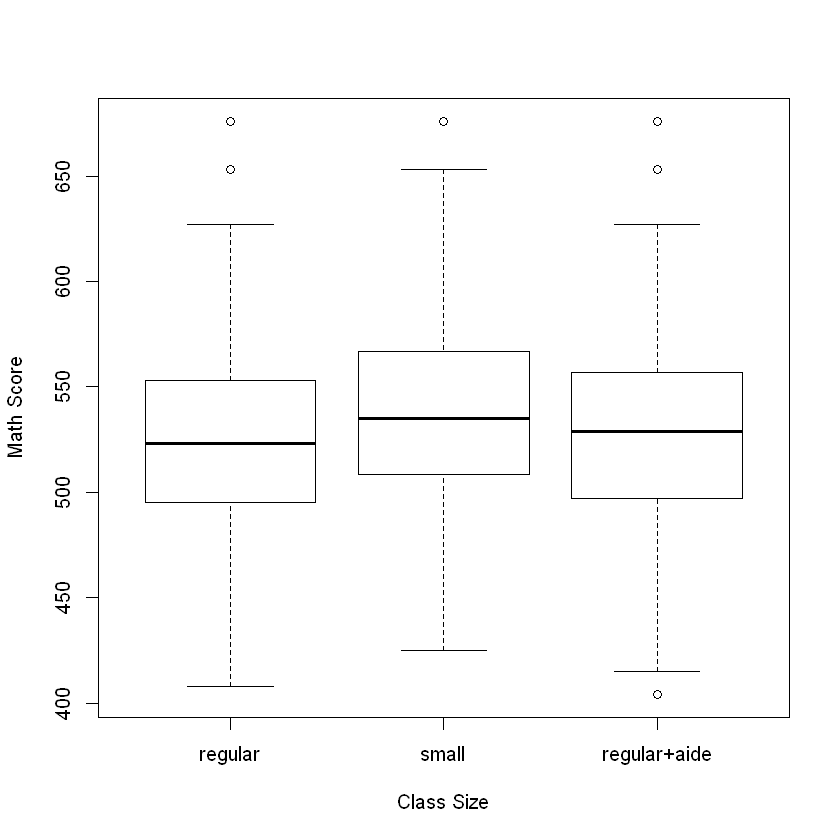

In [4]:
# box plot
boxplot(split(data[,2],data[,1]), xlab = "Class Size", ylab = "Math Score")

<font size = 4>From the box plot above, it seems that the average math scores of 1st grade among three class size are different. The average score in the class of small size is the highest and the average score in the class of regular size is lowest. To test whether it has significant difference among three groups, an one-way ANOVA model is used to analyze.<font size = 4>

# One-way ANOVA

<font size = 4>In an one-way ANOVA model, $Y_{ij}$ denotes the observed outcome(math score) of the jth experimental unit in the ith treatment group(class size). $\mu + \alpha_i$ denotes the ith factor level mean, which is unknown parameters. $\epsilon_{ij}$ denotes random errors. <font size = 4>
<font size = 4>Model Equation: <font size = 4>
    $$Y_{ij} = \mu + \alpha_i+\epsilon_{ij}$$
 <font size = 4>where i = 1,2,3, which is denoted as the factor level; j = 1,...,$n_i$, which is denoted as the experimental unit, $n_i$ is the number of experimental units in the ith treatment group where $n_T = n_1+n_2+n_3=6600$ is the total size sample.<font size = 4>

In [5]:
# Fit the model under the restriction: size "regular" as reference
fit1 <- lm(math1~star1,data=data)

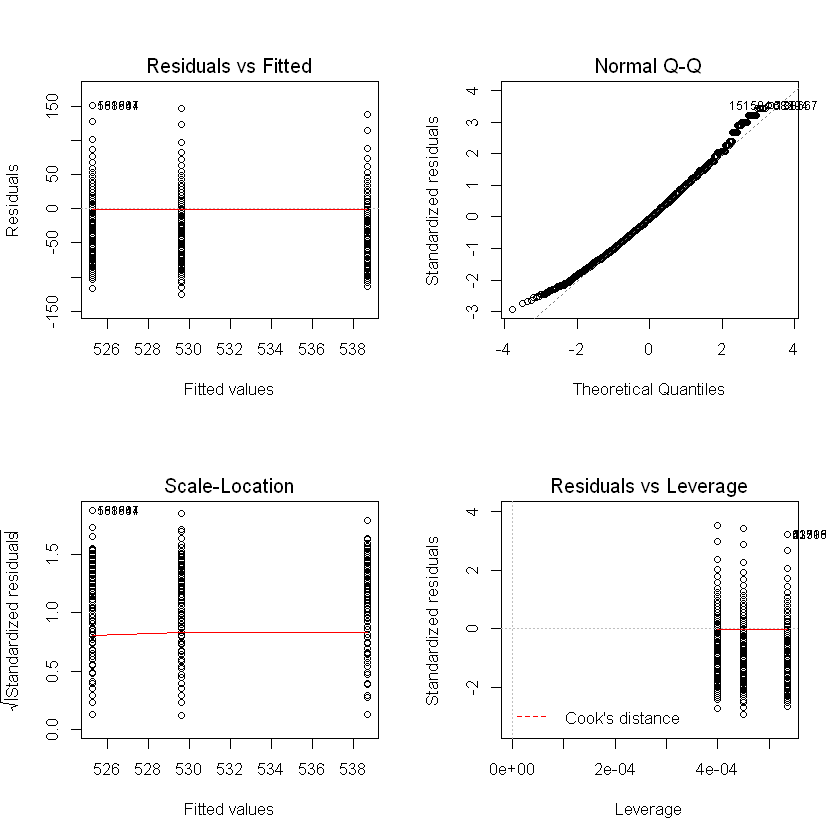

In [6]:
# We explore the diagnostic plots from model fit1
par(mfrow=c(2,2))
plot(fit1)

<font size = 4>From the box plot, each group has outliers that may cause problems. Through the Q-Q plot, it seems that the distribution is relatively light-tailed in both sides. The groups seem to be heteroskedasticity since the residual vs fitted plot shows no sign of unequal error variance. In order to fit a better model, we try to apply Box-Cox transformation to our response variable. <font size = 4>

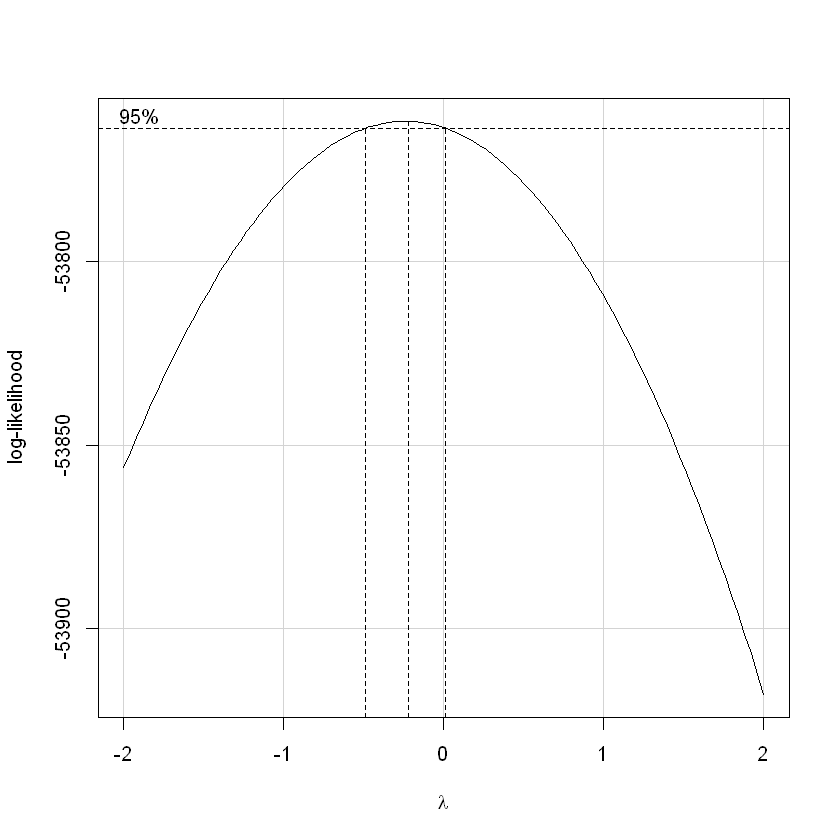

In [7]:
# Box-Cox transformation
boxCox(lm(math1~star1,data=data))

<font size = 4> When we maximize the log-likelihood, the $\lambda$ seems to be close to 0, which means that we should apply log-transformation to math score Y.<font size = 4>

In [8]:
# Model 2 with log-transformation
fit2 <- lm(log(math1)~star1,data=data)

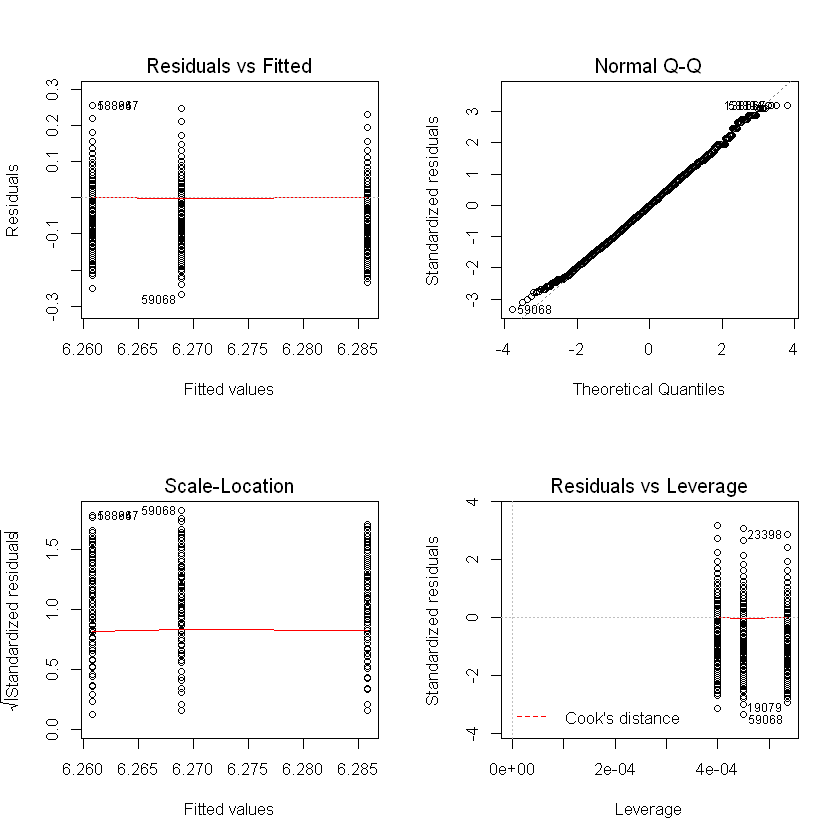

In [9]:
# We explore the diagnostic plots from model fit1
par(mfrow=c(2,2))
plot(fit2)

<font size = 4>From the Q-Q plot, we see that the error distribution is approximately normal and the Residual vs Fitted plot shows no sign of unequal error variance.

In [10]:
# Summary of fit2
summary(fit2)


Call:
lm(formula = log(math1) ~ star1, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.267500 -0.056237 -0.001213  0.054563  0.255399 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)       6.260795   0.001604 3903.206  < 2e-16 ***
star1small        0.024991   0.002455   10.181  < 2e-16 ***
star1regular+aide 0.008121   0.002339    3.472 0.000521 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08031 on 6597 degrees of freedom
Multiple R-squared:  0.01569,	Adjusted R-squared:  0.01539 
F-statistic: 52.57 on 2 and 6597 DF,  p-value: < 2.2e-16


<font size = 4>The model summary provides most of the information we need to perform statistical inference.
<font size = 4> For example, the estimated group means(log-mean) are
    $$\hat\mu_1 = 6.260795 $$for "regular" class size
    $$\hat\mu_2 = 6.285796 $$for "small" class size
    $$\hat\mu_3 = 6.293917 $$for "regular+aide" class size

# Pairwise Comparison

<font size = 4>We can apply pairwise comparisons among three groups. For group i and group j, we set $D_{ij}=\hat\mu_i - \hat\mu_j$, and then
    $$H_0:D_{ij}=0; H_1:D_{ij}\neq0$$
The T statistics is calculated by
$$T={D_{ij}}/{s(D_{ij})}$$
where $s(D_{ij})=\sqrt{MSE(1/n_i+1/n_j)}$

In [11]:
# Pairwise comparison of group 1 (regular size) and group 2 (small size)
n1<-2507 # the number of units in group 1 (regular)
n2<-1868 # the number of units in group 2 (small)
n3<-2225 # the number of units in group 3 (regular+aide)
n<- 6660
l<- 3
d_12<-fit2$coef[2]
sd_12<-summary(fit2)$sig*sqrt(1/n1+1/n2)
t_12<-d_12/sd_12
# p-value
as.numeric(2*(1-pt(abs(t_12),n-l)))

[1] 0

<font size =4>In the significant level 0.05, there is statistically significant difference of math scores between regular size class and small size class  since $p<0.05$.

In [12]:
# Pairwise comparison of group 1 (regular size) and group 3 (regular+aide size)
n1<-2507 # the number of units in group 1 (regular)
n2<-1868 # the number of units in group 2 (small)
n3<-2225 # the number of units in group 3 (regular+aide)
n<- 6660
l<- 3
d_13<-fit2$coef[3]
sd_13<-summary(fit2)$sig*sqrt(1/n1+1/n3)
t_13<-d_13/sd_13
# p-value
as.numeric(2*(1-pt(abs(t_13),n-l)))

[1] 0.000520684

<font size =4>In the significant level 0.05, there is statistically significant difference of math scores between regular size class and regular+aide size class  since $p<0.05$.

In [13]:
# Pairwise comparison of group 2 (small size) and group 3 (regular+aide size)
n1<-2507 # the number of units in group 1 (regular)
n2<-1868 # the number of units in group 2 (small)
n3<-2225 # the number of units in group 3 (regular+aide)
n<- 6660
l<- 3
d_23<-fit2$coef[3]-fit2$coef[2]
sd_23<-summary(fit2)$sig*sqrt(1/n2+1/n3)
t_23<-d_23/sd_23
# CI
c(d_23-qt(0.975,n-l)*sd_23,d_23+qt(0.975,n-l)*sd_23)

star1regular+aide star1regular+aide 
      -0.02181072       -0.01192953

<font size =4>In the significant level 0.05, there is statistically significant difference of math scores between regular size class and regular+aide size class  since 0 is not in the 95% CI of the difference between these two groups.

# Multiple Comparison

<font size =4>In one-way ANOVA test, a significant p-value indicates that some of the group means are different, but we don’t know which pairs of groups are different.
<font size =4>It’s possible to perform multiple pairwise-comparison, to determine if the mean difference between specific pairs of group are statistically significant.

In [14]:
TukeyHSD(aov(log(math1)~star1,data=data))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log(math1) ~ star1, data = data)

$star1
                            diff          lwr         upr     p adj
small-regular         0.02499081  0.019236297  0.03074533 0.0000000
regular+aide-regular  0.00812069  0.002637091  0.01360429 0.0015104
regular+aide-small   -0.01687012 -0.022778294 -0.01096196 0.0000000


- diff: difference between means of the two groups
- lwr, upr: the lower and the upper end point of the confidence interval at 95% (default)
- p adj: p-value after adjustment for the multiple comparisons.

In [24]:
#Use glht() to perform multiple pairwise-comparisons for a one-way ANOVA:
library(multcomp)
res.aov<-aov(log(math1)~star1,data=data)
summary(glht(res.aov, linfct = mcp(star1 = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = log(math1) ~ star1, data = data)

Linear Hypotheses:
                             Estimate Std. Error t value Pr(>|t|)    
small - regular == 0         0.024991   0.002455  10.181  < 0.001 ***
regular+aide - regular == 0  0.008121   0.002339   3.472  0.00159 ** 
regular+aide - small == 0   -0.016870   0.002520  -6.694  < 0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


# Model Diagnosis

<font size = 4>The ANOVA test assumes that, the data are normally distributed and the variance across groups are homogeneous. We can check that with some diagnostic plots.

<font size =5>The Homogeneity of Variance

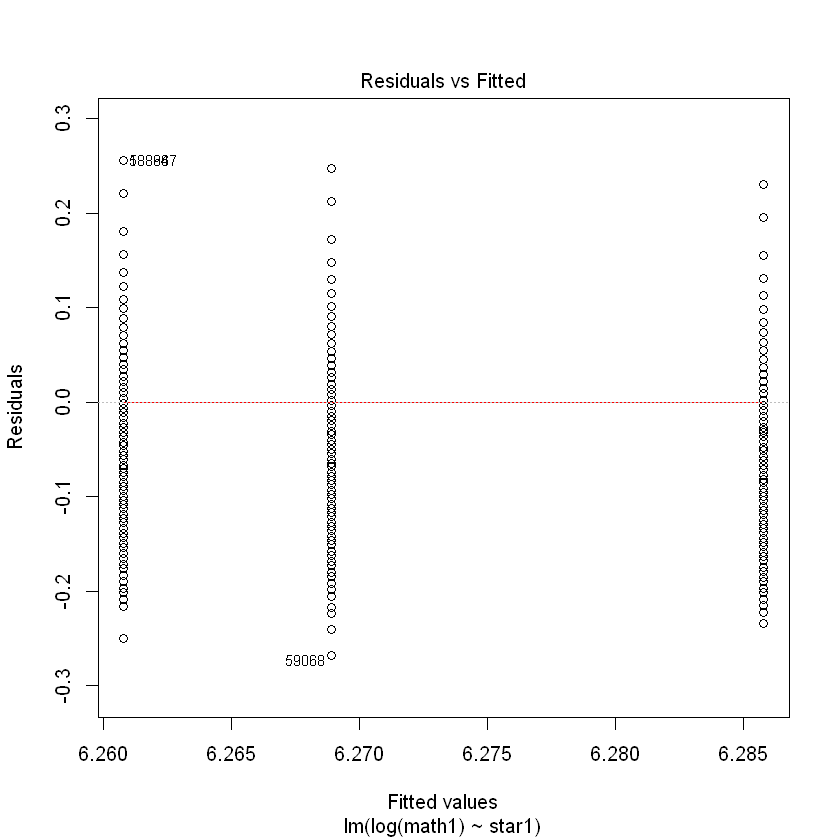

In [16]:
# 1. Residuals vs Fitted plot
plot(fit2, 1)

<font size = 4>In the Residuals vs Fitted plot above, there is no evident relationships between residuals and fitted values (the mean of each groups), which is good. So, we can assume the homogeneity of variances.

In [17]:
# 2. Levene’s test
library(car)
leveneTest(log(math1) ~ star1, data = data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.183622,0.3062328
,6597,NA,NA


<font size =4>From the output above we can see that the p-value is not less than the significance level of 0.05. This means that there is no evidence to suggest that the variance across groups is statistically significantly different. Therefore, we can assume the homogeneity of variances in the different kind of classes.

<font size =5>Normality Assumption

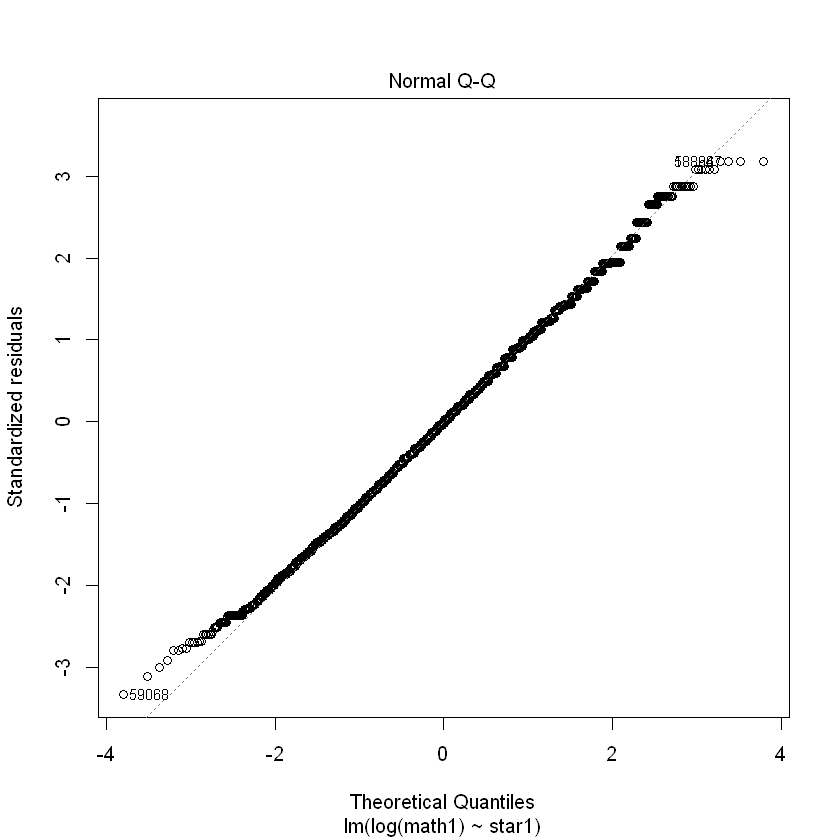

In [18]:
# 1. Q-Q plot
plot(fit2, 2)

<font size = 4>As all the points fall approximately along this reference line, we can assume normality.

In [23]:
# 2. Anderson-Darling normality test
library(nortest)
ad.test(residuals(fit2))$p.value

[1] 0.002017565

<font size =4>From the Anderson-Darling normality test, which works for larger sample sizes, the normality of random error terms is satisfied since $p<0.05$, given the significant level 0.05.

# Additional Models

<font size =5>Relaxing the homogeneity of variance assumption

<font size =4>The classical one-way ANOVA test requires an assumption of equal variances for all groups. In our example, the homogeneity of variance assumption turned out to be fine since the Levene test is not significant. Welch one-way test, which is the ANOVA test with no assumption of equal variances can be used to further analysis.

In [25]:
# Welch one-way test
oneway.test(log(math1) ~ star1, data = data)


	One-way analysis of means (not assuming equal variances)

data:  log(math1) and star1
F = 52.07, num df = 2.0, denom df = 4237.7, p-value < 2.2e-16


<font size =4> From the Welch one-way test, we can reject the null hypothesis that $\mu_1=\mu_2=\mu_3$ since $p<0.05$, given the significant level 0.05.

In [27]:
# Pairwise comparisons adjusted by the Benjamini-Hochberg method
pairwise.t.test(log(data$math1), data$star1,p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  log(data$math1) and data$star1 

             regular small  
small        < 2e-16 -      
regular+aide 0.00052 3.5e-11

P value adjustment method: BH 

<font size =4>The result is a table of p-values for the pairwise comparisons. Here, the p-values have been adjusted by the Benjamini-Hochberg method. Given the significant level 0.05, we can draw the same conclusions as the one-way ANOVA discussed above.

<font size = 5>Non-parametric alternative to one-way ANOVA test

In [28]:
kruskal.test(log(math1) ~ star1, data = data)


	Kruskal-Wallis rank sum test

data:  log(math1) by star1
Kruskal-Wallis chi-squared = 97.993, df = 2, p-value < 2.2e-16


<font size =4> Kruskal-Wallis rank sum test is a non-parametric method for testing whether samples originate from the same distribution. Given the significant level 0.05, we can draw the conclusions that math scores in 1st grade students are significantly different in the three classes with different size since $p<0.05$.